In [2]:
import pandas as pd
import numpy as np
from sklearn.linear_model import LinearRegression
import matplotlib.pyplot as plt

In [4]:
df = pd.read_csv('data/round1/-1.csv', delimiter=';')
products = df['product'].unique()
df = df[df['product'] == products[1]]
df.head()

,day,timestamp,product,bid_price_1,bid_volume_1,bid_price_2,bid_volume_2,bid_price_3,bid_volume_3,ask_price_1,ask_volume_1,ask_price_2,ask_volume_2,ask_price_3,ask_volume_3,mid_price,profit_and_loss
1,-1,0,STARFRUIT,5045,1,5040.0,31.0,NaN,NaN,5047,31,NaN,NaN,NaN,NaN,5046.0,0.0
2,-1,100,STARFRUIT,5040,24,NaN,NaN,NaN,NaN,5046,2,5047.0,22.0,NaN,NaN,5043.0,0.0
5,-1,200,STARFRUIT,5041,2,5040.0,20.0,NaN,NaN,5047,20,NaN,NaN,NaN,NaN,5044.0,0.0
7,-1,300,STARFRUIT,5040,31,NaN,NaN,NaN,NaN,5046,2,5047.0,29.0,NaN,NaN,5043.0,0.0
9,-1,400,STARFRUIT,5039,27,NaN,NaN,NaN,NaN,5046,27,NaN,NaN,NaN,NaN,5042.5,0.0


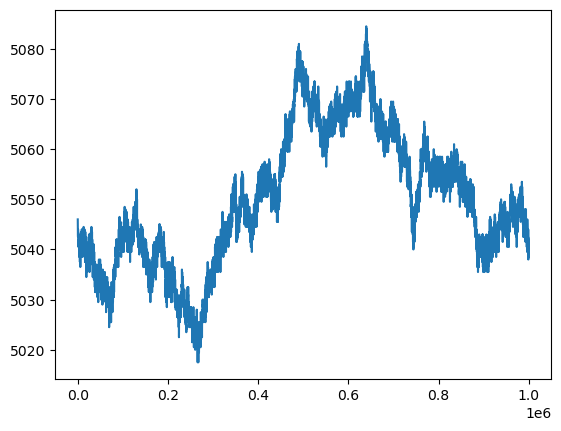

In [5]:
X = df['timestamp']
Y = df['mid_price']
plt.plot(X, Y)

# Online Linear regression

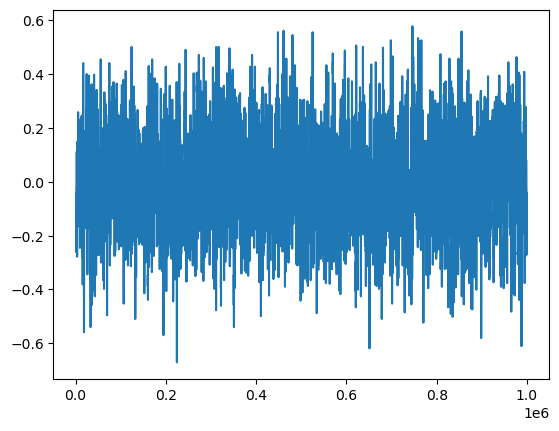

In [133]:
window_size = 10
derivative = []
for i in range(window_size, len(X)):
    model = LinearRegression()
    model = model.fit(np.linspace(0, window_size, num=window_size).reshape(-1,1), Y[i-window_size:i])
    # model = model.fit(X[i-window_size:i].values.reshape(-1, 1), Y[i-window_size:i])
    derivative.append(model.coef_[0])
plt.plot(X[window_size:], derivative)

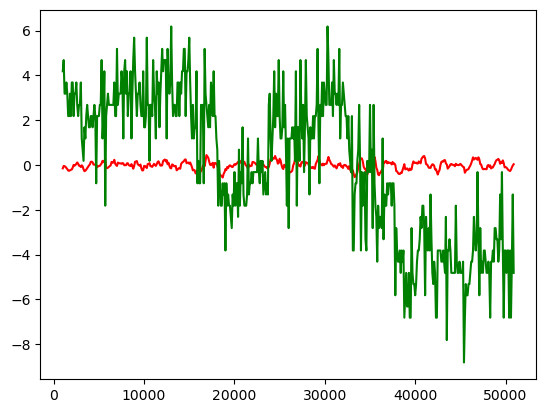

In [136]:
l = window_size + 500
plt.plot(X[window_size:l], derivative[:l-window_size], 'r')
plt.plot(X[window_size:l], Y[window_size:l]-Y[window_size:l].mean(), 'g')

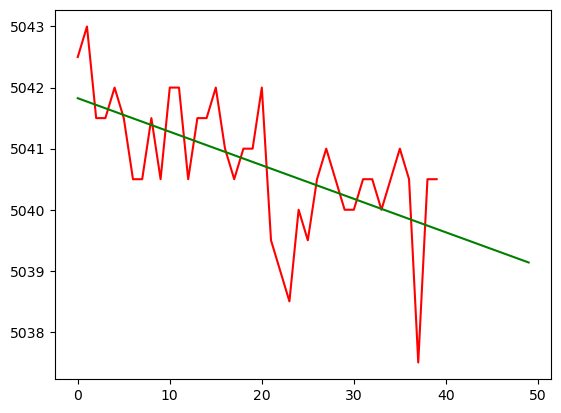

In [129]:
i = 50
window_size = 40
model = LinearRegression()
model = model.fit(np.linspace(0, window_size, num=window_size).reshape(-1,1), Y[i-window_size:i])
plt.plot(Y[i-window_size:i].values.reshape(-1, 1), color='red')

plt.plot(model.predict(np.linspace(0,i).reshape(-1, 1)), color='green')

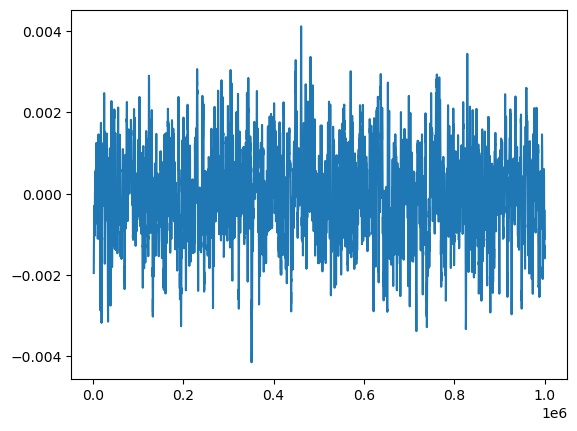

In [8]:
from stock_indicators import Quote

start_date = '2024-01-01'
num_days = len(df)

# Create a datetime range
date_range = pd.date_range(start=start_date, periods=num_days)


quotes_list = [
    Quote(d,o,h,l,c,v) 
    for d,o,h,l,c,v 
    in zip(date_range, df['mid_price'], df['mid_price'], df['mid_price'], df['mid_price'], df['bid_volume_1'] + df['ask_volume_1'])
]   

In [82]:
from stock_indicators import indicators

# len(results), len(df)

In [ ]:
def autoregressive_epma(quotes_list, window_size, steps):
    # Initial EPMA calculation
    epma_values = [x.epma for x in indicators.get_epma(quotes_list, window_size)]
    
    # Autoregressive prediction
    predicted_values = epma_values[-window_size:]  # Seed with the last window_size values
    for _ in range(steps):
        date_range = pd.date_range(start=start_date, periods=window_size)
        quotes_list = [
            Quote(d,o,h,l,c,v) 
            for d,o,h,l,c,v 
            in zip(date_range, , df['mid_price'], df['mid_price'], df['mid_price'], df['bid_volume_1'] + df['ask_volume_1'])
        ]  
        new_value = indicators.get_epma(predicted_values[-window_size:], window_size)[-1]
        predicted_values.append(new_value)
    
    return predicted_values[-steps:]  # Return only the predicted values


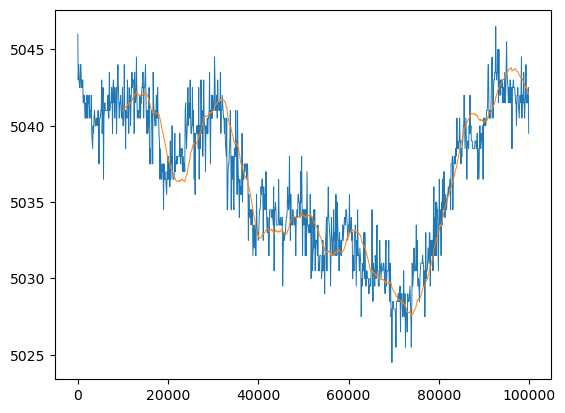

In [89]:
results = indicators.get_epma(quotes_list, 100)
res = pd.DataFrame({'mid_price': df['mid_price'], 'epma': [r.epma for r in results]})
res['epma'] = res['epma']/10
# res = res.iloc[:100]
l = 1000
plt.plot(X[:l], res['mid_price'][:l], linewidth=0.7, label='mid_price')
plt.plot(X[:l], res['epma'][:l], linewidth=0.7, label='epma')

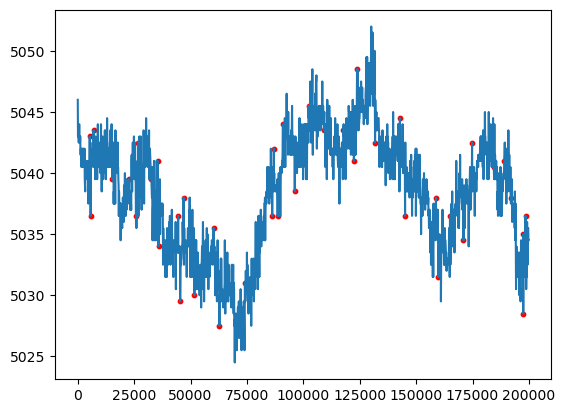

In [80]:

results =indicators.get_parabolic_sar(quotes_list, 0.004, 0.05)
results[-1].is_reversal

# r = np.array([r.is_reversal for r in results if r.is_reversal is not None else False])
r = np.array([r.is_reversal if r.is_reversal is not None else False for r in results])

xr = np.array([r.sar for r in results])
l= 2000
plt.plot(X[:l], Y[:l])
plt.scatter(X[:l][r[:l]], Y[:l][r[:l]], color='red', s=10)

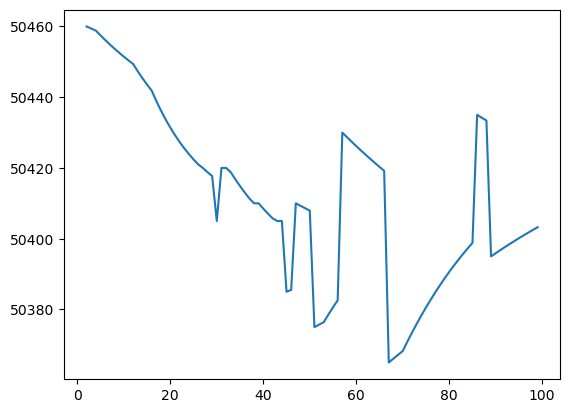

In [68]:
plt.plot(xr[:l])

In [94]:

results = indicators.get_super_trend(quotes_list)

In [106]:
results[-200].super_trend

InvalidOperation: [<class 'decimal.ConversionSyntax'>]